In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import lightgbm as lgb
from sklearn.metrics import classification_report, confusion_matrix
warnings.filterwarnings("ignore")

In [42]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.1 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.9 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.9 MB/s eta 0:00:00


In [2]:
df=sns.load_dataset("titanic")

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


<Axes: xlabel='sex', ylabel='count'>

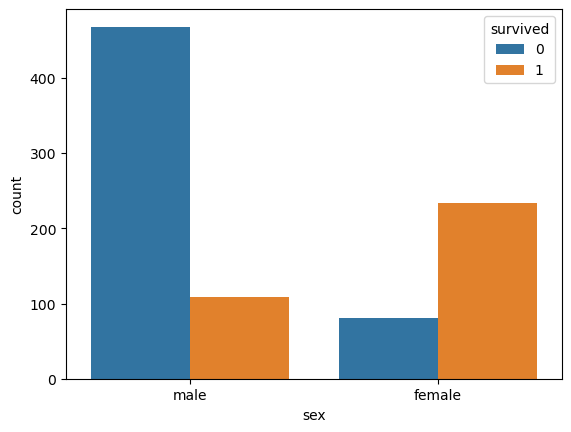

In [5]:
sns.countplot(data=df,x="sex",hue="survived")

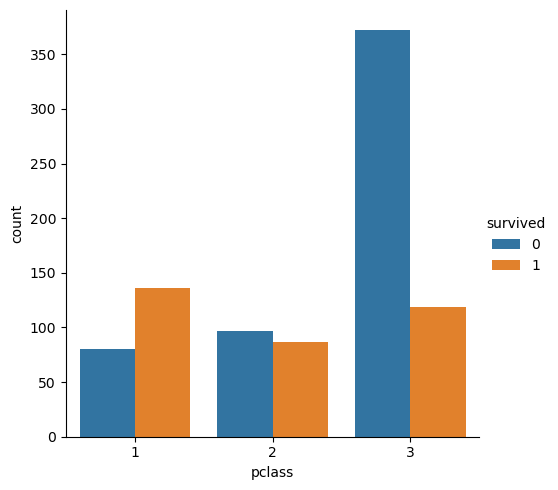

In [27]:
sns.catplot(x='pclass', hue='survived', kind='count', data=df)
plt.show()

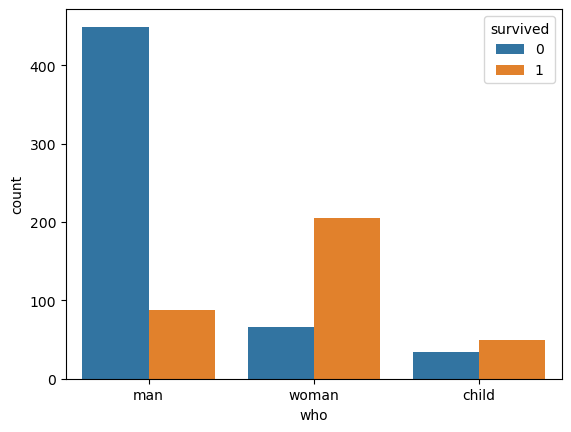

In [29]:
sns.countplot(x='who', hue='survived', data=df)
plt.show()

<Axes: ylabel='age'>

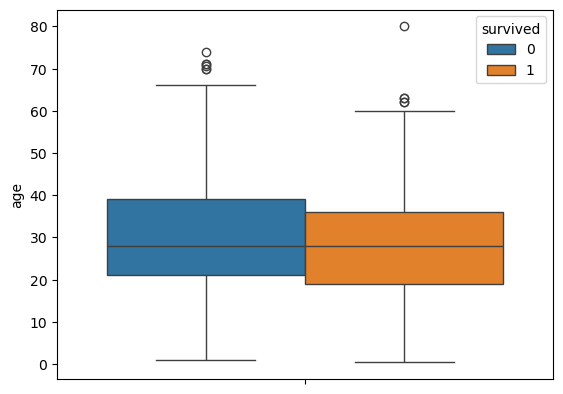

In [21]:
sns.boxplot(data=df,y="age",hue="survived")

<Axes: ylabel='age'>

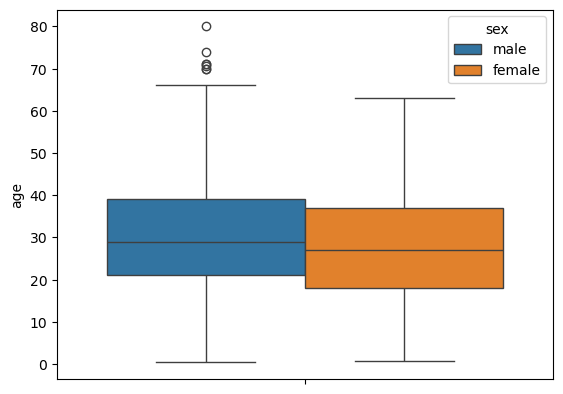

In [22]:
sns.boxplot(data=df,y="age",hue="sex")

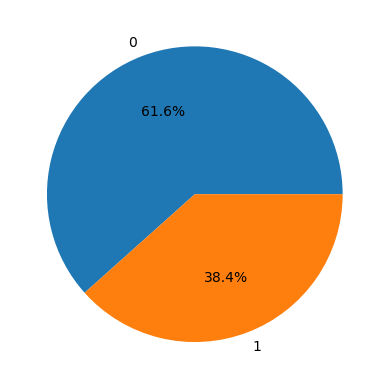

In [17]:
plt.pie(x=df["survived"].value_counts(),labels=df["survived"].value_counts().index,autopct='%1.1f%%')
plt.show()

<Axes: xlabel='age', ylabel='Count'>

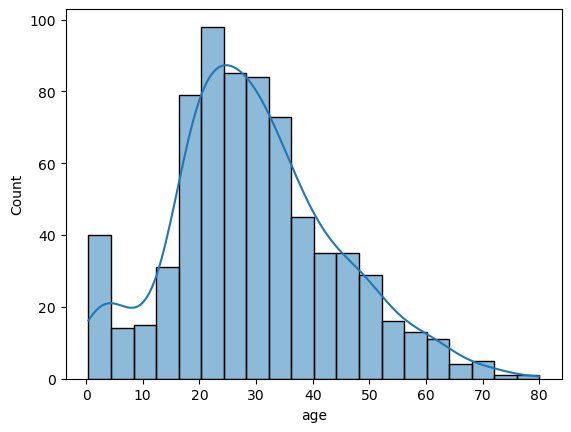

In [26]:
sns.histplot(data=df,x="age",kde=True)

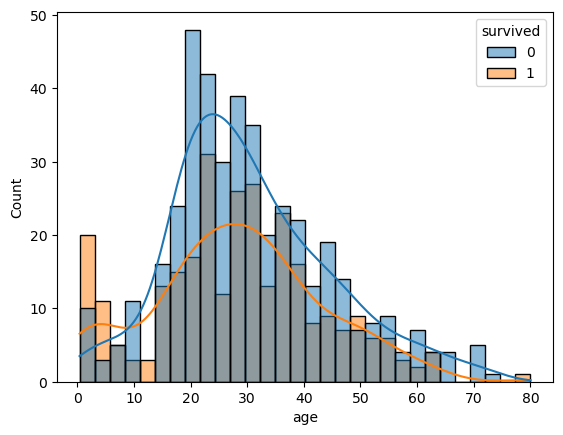

In [28]:
sns.histplot(data=df, x='age', hue='survived', bins=30, kde=True)
plt.show()

<Axes: >

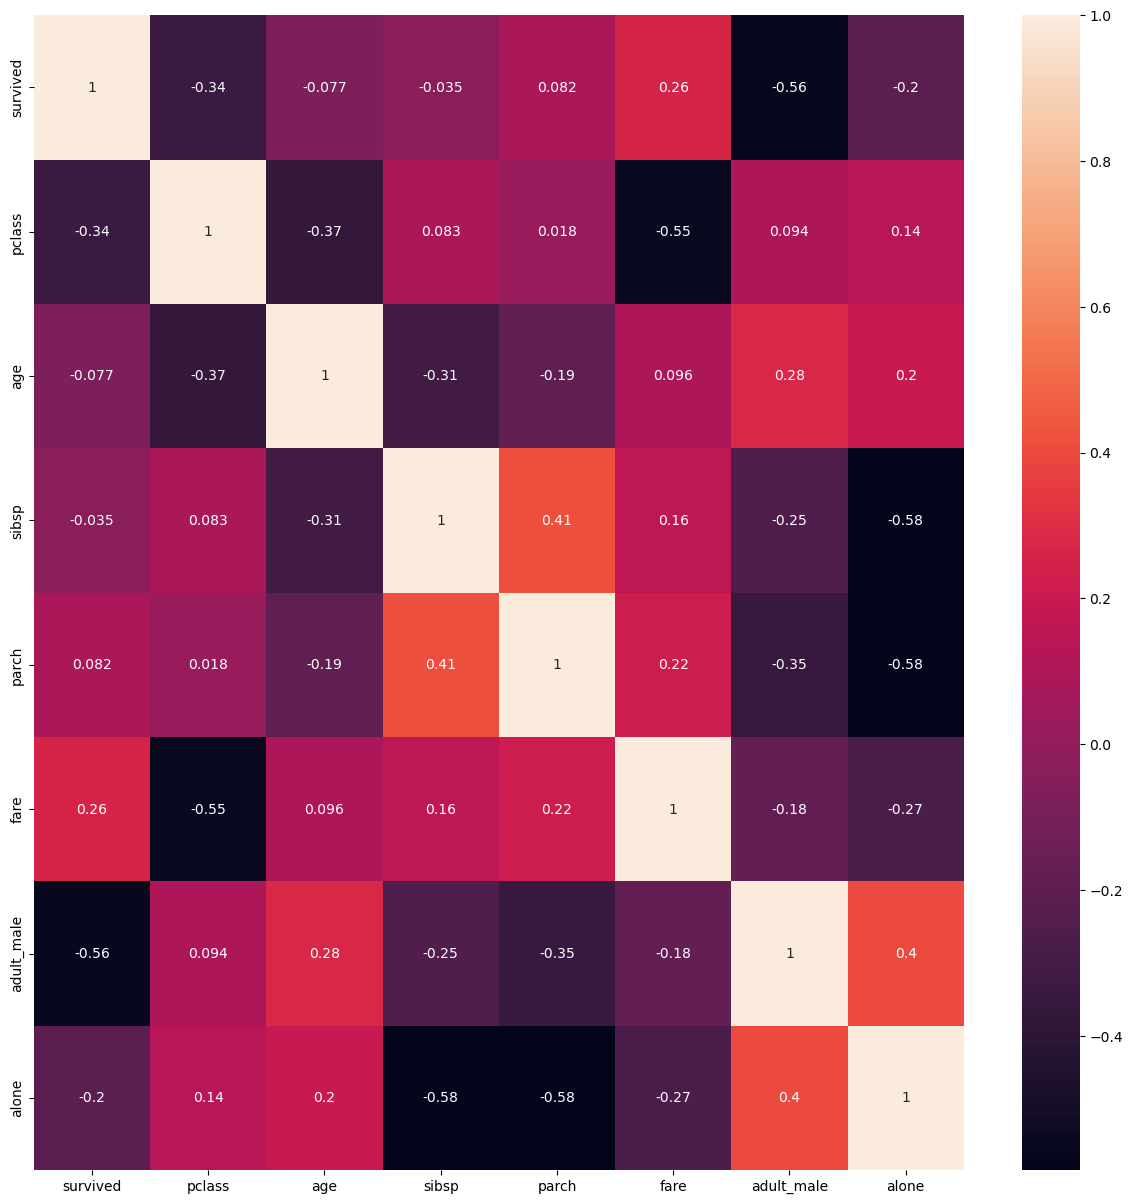

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(data=df.corr(numeric_only=True),annot=True)

In [31]:
df = df.drop(['deck', 'embark_town', 'alive'], axis=1)

In [33]:
df.isnull().sum()

survived        0
pclass          0
sex             0
age           177
sibsp           0
parch           0
fare            0
embarked        2
class           0
who             0
adult_male      0
alone           0
dtype: int64

In [34]:
df['age'] = df['age'].fillna(df['age'].mode())
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

In [35]:
df['adult_male'] = df['adult_male'].astype(int)
df['alone'] = df['alone'].astype(int)

In [36]:
X = df.drop('survived', axis=1)
y = df['survived']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 15)

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['sex', 'class', 'who','embarked']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  
)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
encoded_cols = preprocessor.get_feature_names_out()

ValueError: Specifying the columns using strings is only supported for dataframes.

In [41]:
X_train = pd.DataFrame(X_train, columns = encoded_cols)
X_test = pd.DataFrame(X_test, columns = encoded_cols)
X_train.head()

NameError: name 'encoded_cols' is not defined

In [43]:
clf = lgb.LGBMClassifier(verbosity=-1)
clf.fit(X_train, y_train)

NameError: name 'lgb' is not defined

In [45]:
y_pred = clf.predict(X_test)
print(classification_report(y_pred,y_test))
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',)

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('LightGBM Classifier')
plt.show()

NameError: name 'clf' is not defined

In [46]:
importances = clf.feature_importances_

feature_names = X_train.columns
feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_importance)

NameError: name 'clf' is not defined

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

lgb_model = lgb.LGBMClassifier(verbosity=-1)

param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'max_depth': [3, 5, 7, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'num_leaves': [15, 31, 63, 127],
    'min_child_samples': [5, 10, 20],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
)

random_search.fit(X_train, y_train)